## Lack of robustness of the Markowitz Procedure, and the GMV

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import edhek_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

In [3]:
l = ["Food", "Steel"]
w_msr = erk.msr(0.1, er[l], cov.loc[l, l])
w_msr

array([0.75040362, 0.24959638])

In [4]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

In [6]:
# Even a small change in expected returns can cause a dramatic change in the allocation 
# of weights
erk.msr(0.1, np.array([.11, .12]), cov.loc[l, l])

array([0.57930354, 0.42069646])

In [7]:
erk.msr(0.1, np.array([.10, .13]), cov.loc[l, l])

array([0., 1.])

In [8]:
erk.msr(0.1, np.array([.13, .10]), cov.loc[l, l])

array([1.00000000e+00, 5.55111512e-17])

<Axes: xlabel='Volatility'>

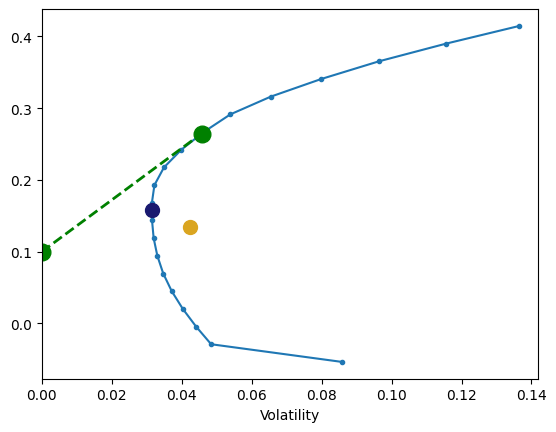

In [15]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True)